Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading dataset

In [ ]:
from google.colab import files
files.upload()

Saving Wine_clust .csv to Wine_clust .csv


{'Wine_clust .csv': b'Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline\r\n14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065\r\n13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050\r\n13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185\r\n14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480\r\n13.24,2.59,2.87,21,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735\r\n14.2,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450\r\n14.39,1.87,2.45,14.6,96,2.5,2.52,0.3,1.98,5.25,1.02,3.58,1290\r\n14.06,2.15,2.61,17.6,121,2.6,2.51,0.31,1.25,5.05,1.06,3.58,1295\r\n14.83,1.64,2.17,14,97,2.8,2.98,0.29,1.98,5.2,1.08,2.85,1045\r\n13.86,1.35,2.27,16,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045\r\n14.1,2.16,2.3,18,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510\r\n14.12,1.48,2.32,16.8,95,2.2,2.43,0.26,1.57,5,1.17,2.82,1280\r\n13.75,1.73,2.41,16,89,2.6,2.76,0.29,1.81,5.6,1.15,

In [ ]:
data = pd.read_csv('Wine_clust .csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

Taking 2 features for easy visualization (color_intensity and hue)

In [22]:
x = data.iloc[:,[9,10]].values

KMeans Elbow method

In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

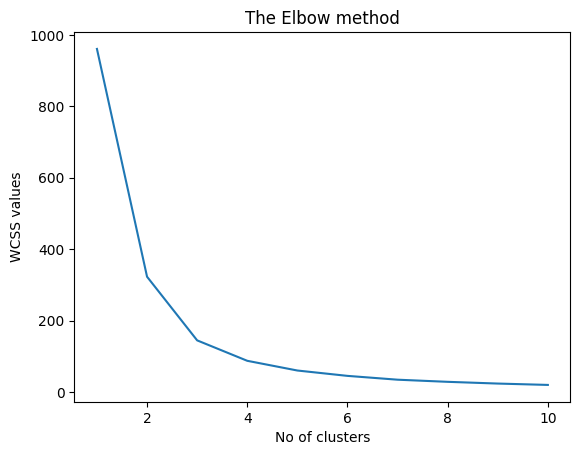

In [24]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i,init = 'k-means++', random_state = 42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS values')
plt.show()

KMeans model

In [25]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
y_kmeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

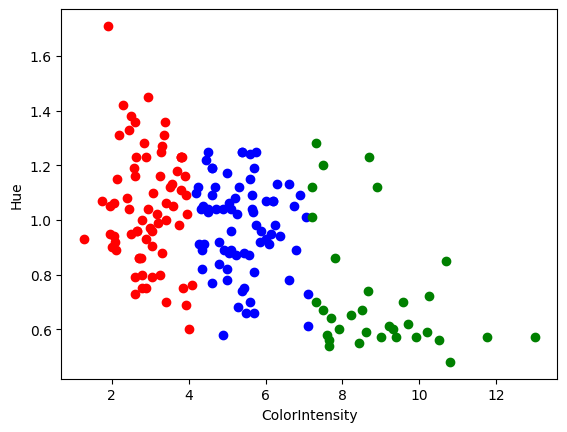

In [35]:
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1],  c='red', label = 'Cluster1')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], c='blue', label = 'Cluster2')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1],  c='green', label = 'Cluster3')
plt.xlabel('ColorIntensity')
plt.ylabel('Hue')
plt.show()

In [30]:
from sklearn.metrics import silhouette_score

In [37]:
sil_kmean = silhouette_score(x, y_kmeans)
sil_kmean

0.5680199017667299

Agglomerative Heirarchical clustering

In [26]:
import scipy.cluster.hierarchy as sch

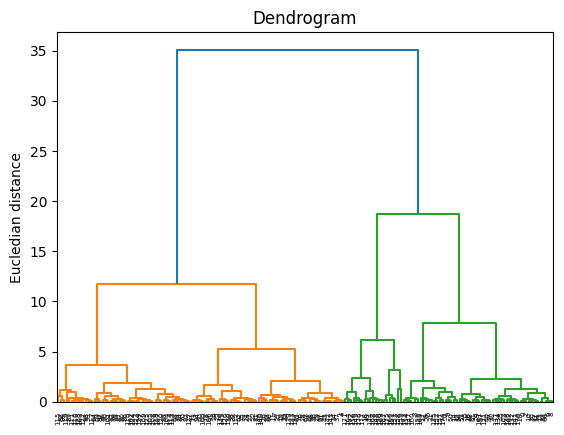

In [27]:
dend = sch.dendrogram(sch.linkage(x, method = "ward"))
plt.title('Dendrogram')
plt.ylabel('Eucledian distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [28]:
hc = AgglomerativeClustering(n_clusters = 4, linkage = 'ward', metric = 'euclidean')

In [29]:
y_hc = hc.fit_predict(x)
y_hc

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 1, 1, 3, 1,
       0, 1, 3, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 1, 3, 3, 3, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 0, 2,
       0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2])

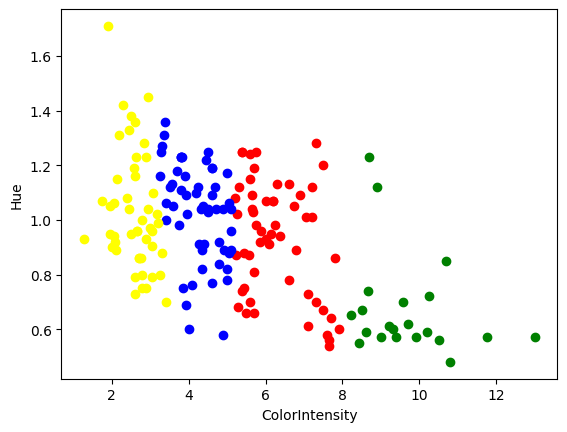

In [34]:
plt.scatter(x[y_hc == 0,0], x[y_hc == 0,1],  c='red', label = 'Cluster1')
plt.scatter(x[y_hc == 1,0], x[y_hc == 1,1], c='blue', label = 'Cluster2')
plt.scatter(x[y_hc == 2,0], x[y_hc == 2,1],  c='green', label = 'Cluster3')
plt.scatter(x[y_hc == 3,0], x[y_hc == 3,1],  c='yellow', label = 'Cluster4')
plt.xlabel('ColorIntensity')
plt.ylabel('Hue')
plt.show()

In [38]:
sil_hc = silhouette_score(x, y_hc)
sil_hc

0.4838856372213844

DBScan model

Note: The DBSCAN algorithm is based on this intuitive notion of “clusters” and “noise”. The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points.

In [39]:
from sklearn.cluster import DBSCAN

In [49]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_db = dbscan.fit_predict(x)
y_db

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

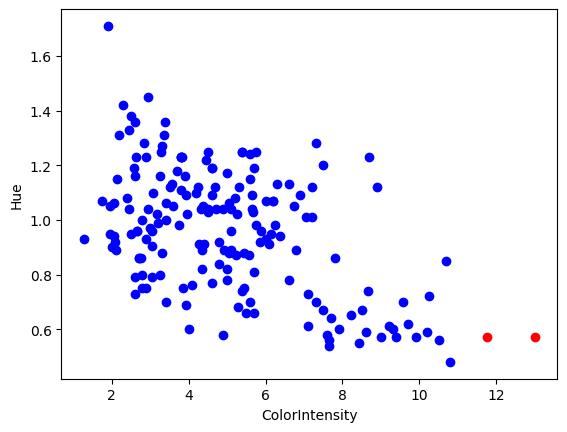

In [52]:
plt.scatter(x[y_db == -1,0], x[y_db == -1,1],  c='red', label = 'Cluster1')
plt.scatter(x[y_db == 0,0], x[y_db == 0,1], c='blue', label = 'Cluster2')
plt.xlabel('ColorIntensity')
plt.ylabel('Hue')
plt.show()

In [50]:
sil_db = silhouette_score(x, y_db)
sil_db

0.5958724857940789